In [227]:
#---------------Linear Regression Model - Walmart Sales------------------
 
#Preparing and Evaluating the Data

#Import Dependancies
import pandas as pd
import numpy as np
from datetime import datetime
from scipy import stats

#Import and Read the dataset

df = pd.read_csv('Walmart_sales.csv')
df.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [228]:
#Check for missing values - In this example there are no missing values.
print(df.isnull().sum())

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [229]:
#Checking data types
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [230]:
#Need to convert Date column to datetime type so we can perform feature engineering
df['Date'] = pd.to_datetime(df['Date'], format='mixed') #Had to use a format because the date wasnt set to m,d,y

In [231]:
#Check that Date column shows updated data type
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [232]:
#Feature Engineering month and year from Date column

#Extracting month, year and day name from date column

df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year

df['day_of_week'] = df['Date'].dt.day_name()

#Show data sample
df.head()






,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year,day_of_week
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010,Sunday
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010,Thursday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,Friday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,Friday
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010,Monday


In [233]:
df.describe() #Look at the stats to see if there are any outliers.  CPI and unemployment seem to be the only ones that stick out.

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 20:18:27.692307712,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,6.475524,2010.965035
min,1.000000,2010-01-10 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,1.000000,2010.000000
25%,12.000000,2010-10-12 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,4.000000,2010.000000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,6.000000,2011.000000
75%,34.000000,2012-03-02 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,9.000000,2012.000000
max,45.000000,2012-12-10 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,12.000000,2012.000000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,3.321797,0.797019


In [234]:
#Lets plot the outliers

fig = px.box(df, y="CPI") #Close to median,  nothing significant
fig.show()

In [235]:
fig = px.box(df, y="Unemployment") #A few outliers but close to median 
fig.show()

In [236]:
fig = px.box(df, y="Weekly_Sales") #Several outliers, again close to median
fig.show()



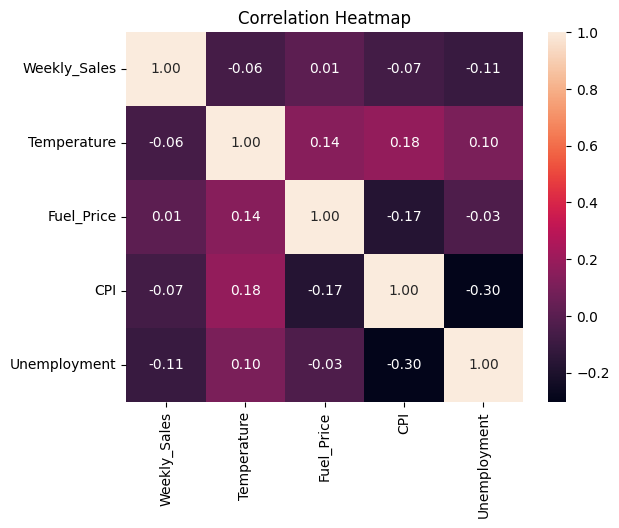

In [237]:
#Feature Correlation
correlation_matrix = df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()
plt.figure()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#CPI has a strong negative correlation to unemployment and Fuel Price. So if Fuel price goes up, CPI
#goes down and vice versa.
#CPI and Tempurature have a strong positive correlation. Meaning if temp goes up,  so does CPI
#Looking at weekly sales we can see it has a pretty strong negative correlation to unemployment. So if unemployment
#goes up,  weekly sales goes down. 


In [238]:
#Normalizing weekly sales and unemployment because they are correlated but have very differnt values

from sklearn.preprocessing import MinMaxScaler
minmax_scale = MinMaxScaler().fit(df[['Weekly_Sales', 'Unemployment']])
df_minmax = minmax_scale.transform(df[['Weekly_Sales', 'Unemployment']])

print('Min-value after normalization:\nWeekly_Sales={:.2f}, Unemployment={:.2f}'
      .format(df_minmax[:,0].min(), df_minmax[:,1].min()))
print('\nMax-value after normalization:\nWeekly_Sales={:.2f}, Unemployment={:.2f}'
      .format(df_minmax[:,0].max(), df_minmax[:,1].max()))

Min-value after normalization:
Weekly_Sales=0.00, Unemployment=0.00

Max-value after normalization:
Weekly_Sales=1.00, Unemployment=1.00


In [239]:
#Standardinging same data - rescaling

from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler().fit(df[['Weekly_Sales', 'Unemployment']])
df_std = std_scale.transform(df[['Weekly_Sales', 'Unemployment']])

print('Mean after standardization:\nWeekly_Sales={:.2f}, Unemployment={:.2f}'
      .format(df_std[:,0].mean(), df_std[:,1].mean()))

Mean after standardization:
Weekly_Sales=0.00, Unemployment=-0.00


In [240]:
#------------Building the Linear Regression Model------------ 

#Import needed dependancies
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

X = df[['Unemployment']]
y = df['Weekly_Sales']



In [241]:
#Splitting between training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

#Prediction on the testing set
y_pred = model.predict(X_test)

In [248]:
#Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:",mse**0.5)

Mean Squared Error: 320543593680.03174
Root Mean Squared Error: 566165.6945453617


In [243]:
#Interpret coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nCoefficients:")
print(coefficients)


Coefficients:
               Coefficient
Unemployment -33946.206521


In [249]:
# Calculate R squared

model.fit(X,y)
r_squared = model.score(X,y)
print (r_squared)

0.011273362015053912


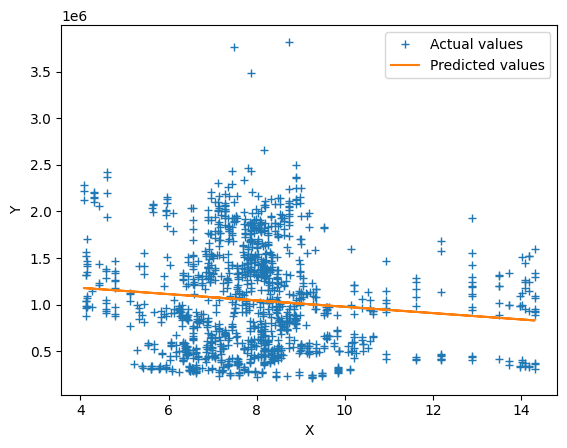

In [245]:
plt.plot(X_test, y_test, "+", label="Actual values")
plt.plot(X_test, y_pred, label="Predicted values")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

Conclusion:

The coeffienct and correlation matrix suggest that when unemployment is high, weekly sales are down. I normalized the data between the two but the r2, MSE, and RMSE suggest that the model wont be too accurate in predicting if unemployment has an effect on sales. 

In my correlation matrix,  CPI also had a strong negative correlation to unemployment which tells that the CPI is high, unemployment is low which could be caused by inflation. 
